<a href="https://colab.research.google.com/github/joshuadollison/MAT421/blob/main/MAT421_16133_HW12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy.linalg import eig
from numpy.linalg import eigvals

import networkx as nx
import matplotlib.pyplot as plt

from scipy.sparse.linalg import eigsh

# **Homework 12**
Joshua Dollison

MAT421-16133

4/13/2025

# **1: Graph Models**

This section introduces the fundamentals of graph-based network models. Graphs consist of nodes (vertices) and edges, representing relationships between entities. Graphs can be directed or undirected, and are widely used in data science, especially in social network analysis, to represent and analyze structures like friendships, interactions, and communications. Key concepts include paths, degrees, and centrality.

---

### **Example 1.1**
This example demonstrates how to create an undirected graph using NetworkX, compute node degrees, and visualize the graph with labels.

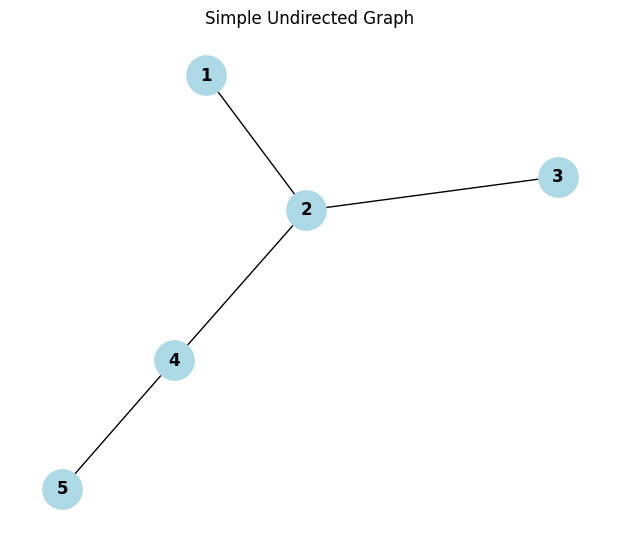

Degree Centrality:
Node 1: 0.25
Node 2: 0.75
Node 3: 0.25
Node 4: 0.50
Node 5: 0.25


In [2]:
# Create a simple undirected graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (2, 4), (4, 5)])

# Compute degree centrality
centrality = nx.degree_centrality(G)

# Draw the graph
plt.figure(figsize=(6, 5))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_weight='bold')
plt.title("Simple Undirected Graph")
plt.show()

# Print degree centrality
print("Degree Centrality:")
for node, cent in centrality.items():
    print(f"Node {node}: {cent:.2f}")

### **Example 1.2**

This GPT inspired real-world example simulates a small social network using random graph generation, identifies top influencers using degree centrality, and visualizes then the network.

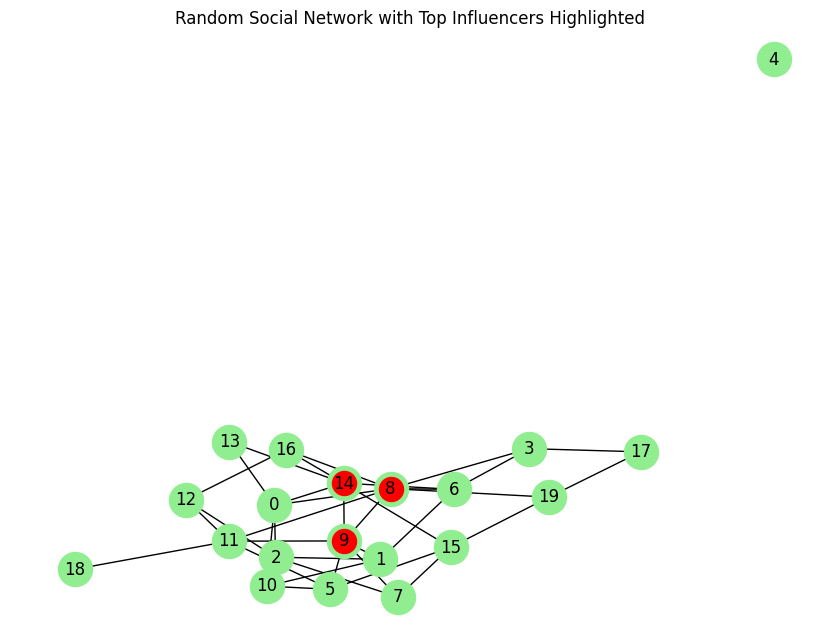

Top Influencers by Degree Centrality:
Node 8: 0.37
Node 9: 0.32
Node 14: 0.32


In [3]:
# Generate a random graph (Erdős–Rényi)
n = 20
p = 0.2
G = nx.erdos_renyi_graph(n, p, seed=42)

# Compute centrality
centrality = nx.degree_centrality(G)
top_nodes = sorted(centrality.items(), key=lambda x: -x[1])[:3]

# Plot
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=600)
nx.draw_networkx_nodes(G, pos, nodelist=[x[0] for x in top_nodes], node_color='red')
plt.title("Random Social Network with Top Influencers Highlighted")
plt.show()

# Show top influencers
print("Top Influencers by Degree Centrality:")
for node, cent in top_nodes:
    print(f"Node {node}: {cent:.2f}")

# **2: Laplacian Matrices**

This section introduces the Laplacian matrix of a graph, a key structure used in spectral graph theory. It is defined as $L = D - A$, where $D$ is the degree matrix and $A$ is the adjacency matrix. The Laplacian is used to measure connectivity and analyze spectral properties of the network.

---

### **Example 2.1**

This example creates a weighted undirected graph, computes its Laplacian matrix, and shows its eigenvalues and eigenvectors.

In [4]:
# Create a weighted graph
G = nx.Graph()
G.add_weighted_edges_from([(0, 1, 2), (1, 2, 3), (2, 3, 1), (3, 0, 4)])

# Compute Laplacian matrix
L = nx.laplacian_matrix(G).toarray()

# Eigen decomposition
ev, eigvecs = eig(L)

print("Laplacian Matrix:\n", L)
print("\nEigenvalues:\n", np.round(ev, 2))

Laplacian Matrix:
 [[ 6 -2  0 -4]
 [-2  5 -3  0]
 [ 0 -3  4 -1]
 [-4  0 -1  5]]

Eigenvalues:
 [10.43 -0.    2.86  6.72]


### **Example 2.2**

This GPT inspired real-world example applies Laplacian matrix analysis to a simulated sensor network, demonstrating its use in evaluating network connectivity.

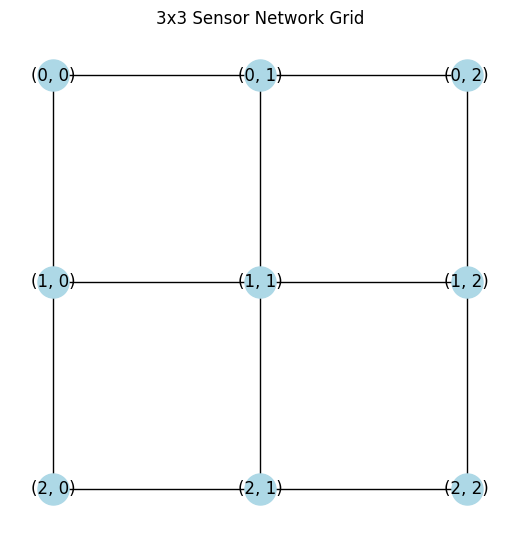

Laplacian Eigenvalues (rounded):
[-0.  1.  1.  2.  3.  3.  4.  4.  6.]


In [5]:
# Generate a 3x3 sensor grid
G = nx.grid_2d_graph(3, 3)

# Compute Laplacian and eigenvalues
L = nx.laplacian_matrix(G).toarray()
e_vals = eigvals(L)

# Plot the graph
plt.figure(figsize=(5, 5))
pos = {(x, y): (y, -x) for x, y in G.nodes()}
nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='lightblue')
plt.title("3x3 Sensor Network Grid")
plt.show()

# Print connectivity info
print("Laplacian Eigenvalues (rounded):")
print(np.round(np.sort(e_vals), 2))

# **3: Spectral Graph Bipartitioning**

Spectral bipartitioning uses the eigenvector corresponding to the second smallest eigenvalue of the Laplacian matrix (Fiedler vector) to divide a graph into two balanced communities. This is a powerful method for clustering in networks.

---

### **Example 3.1**

This example finds the Fiedler vector and partitions a small graph into two communities.

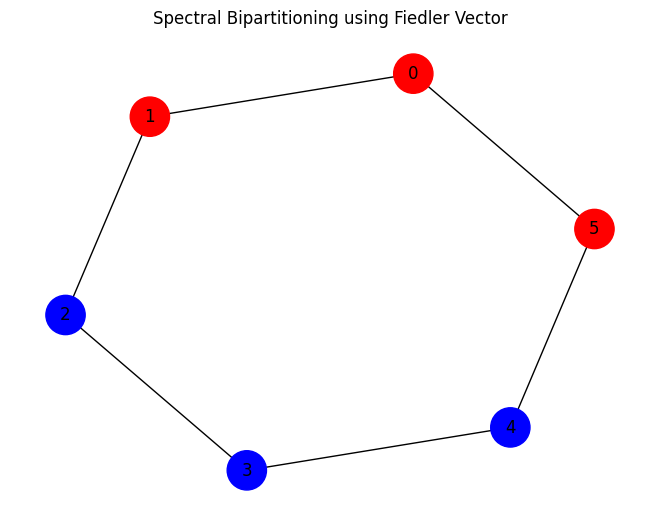

In [6]:
# Create graph
G = nx.cycle_graph(6)
L = nx.laplacian_matrix(G).astype(float)

# Compute Fiedler vector
eigvals, eigvecs = eigsh(L, k=2, which='SM')
fiedler_vector = eigvecs[:, 1]

# Partition nodes
partition = {i: 0 if val < 0 else 1 for i, val in enumerate(fiedler_vector)}

# Visualize partitioned graph
colors = ['red' if partition[node] == 0 else 'blue' for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=colors, node_size=800)
plt.title("Spectral Bipartitioning using Fiedler Vector")
plt.show()

### **Example 3.2**

This example detects communities in a stochastic block model graph using spectral bipartitioning.


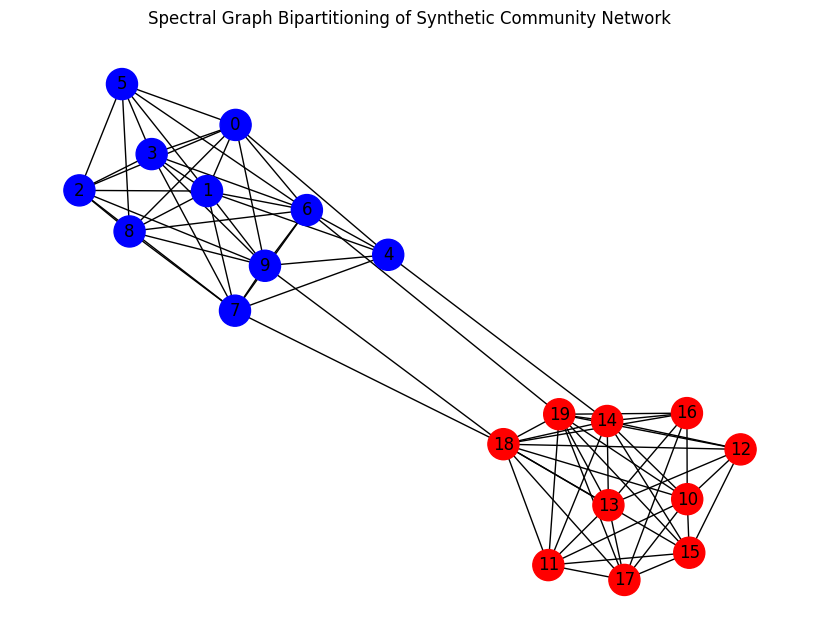

In [7]:
# Generate SBM graph (2 communities)
sizes = [10, 10]
probs = [[0.8, 0.05], [0.05, 0.8]]
G = nx.stochastic_block_model(sizes, probs, seed=42)
L = nx.laplacian_matrix(G).astype(float)

# Compute Fiedler vector
eigvals, eigvecs = eigsh(L, k=2, which='SM')
fiedler_vector = eigvecs[:, 1]
partition = [0 if x < 0 else 1 for x in fiedler_vector]

# Visualization
colors = ['red' if part == 0 else 'blue' for part in partition]
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos=pos, node_color=colors, with_labels=True, node_size=500)
plt.title("Spectral Graph Bipartitioning of Synthetic Community Network")
plt.show()